## Aufgabe 22:

a) Die Lossfunktion beschreibt wie gut der Algorithmus klassifiziert hat. Über sie kann eine spezielle Menge an gewichten quantifiziert werden. 

b) Die Lossfunktion wird über das Gradientenverfahren minimiert. Wir starten mit zufällig initialisierten Werten für die gewichte und passen diese dann schrittweise an.

c) Die Aktivierungsfunktion bestimmt, wie der Aktivierungszustand eines Neurons von der Eingabe aller anderen Neuronen, die mit diesem Neuron verbunden sind, abhängt. Sie verknüpft so die Gewichte eines Neurons mit dem Input.
Die drei gängigen Aktivierungsfunktionen sind die Sigmoid Funktion, der Tangens Hyperbolicus und die RectifiedLinear Unit (ReLU).

d) Ein Neuron bildet die Basis des Neuronalen Netzes. Es wird über die Aktivierungsfunktion entschieden ob es von einem gegebenen Input "eingeschaltet" wird. Über die verknüpfung der Neuronen kann dann der Input klassifiziert werden. Die nomenklatur folgt aus der biologischen Motivation.

e) Neuronale Netze können sehr gut auf rohe Daten angewandt werden zum Beispiel für die Bildvearbeitung. Dabei wird jeder Pixel des Bildes als ein Feature verstanden. Die nachfolgenden Layer "schauen"sich dann gewisse Eigenschaften des Bildes an um es dann am Ende zu klassifizieren. Neuronale Netze finden aber auch Anwendung in der Sprachverarbeitung oder im "reinforcement learning". Bei letzterem kann das Netz sehr gut in einer Umgebung(z.B. Atari Enviroment von OpenAI) die Verhaltensweise unter gewissen Regeln lernen/optimieren.

## Aufgabe 23:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_hdf('populationen.hdf5', key = 'P_0') #read the dataframes
df2 = pd.read_hdf('populationen.hdf5', key = 'P_1') 
df1['Label']= 0 #add the labels
df2['Label']= 1
df1['population 0'] = 1 #introduce those columns to create the indicator function
df1['population 1'] = 0
df2['population 0'] = 0
df2['population 1'] = 1
df = pd.concat([df1,df2], ignore_index=True) #combine the dataframes 
df.head()

,x,y,Label,population 0,population 1
0,0.926612,4.717092,0,1,0
1,-3.953953,1.274478,0,1,0
2,-7.161693,-0.984415,0,1,0
3,-0.956840,1.115828,0,1,0
4,-0.046090,2.083444,0,1,0


In [3]:
X = df[['x','y']]
y = df[['population 0','population 1']].to_numpy()
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [4]:
# we have 2 classes and 2 attributes
K = 2
p = 2 

# include the bias into the weight matrix
np.random.seed(42)
W = np.random.normal(size=(p+1, K))#+1 to include the bias vector in the matrix


In [5]:
# softmax function shifted to zero so no numerical isntalbilities arise.
def softmax(f):
    f_shifted = f - f.max()
    p = np.exp(f_shifted).T/np.sum(np.exp(f_shifted), axis=1)
    return p.T

# loss for the entire training set
def loss_cross_ent(X, y, W):
    f = X@W 
    q = softmax(f)
    l = -np.sum(y*np.log2(q), axis=1)
    return l.mean() # the mean over all samples in the batch/dataset


In [6]:
def gradient(W, X, y):
    f = X@W
    p = softmax(f)
    dh = (p - y)
    dW = ( X.T@dh ) / dh.shape[0]#numerical derivation 
    return dW

def gradient_descent(X, y, loss_function, max_iter=100, step_size=0.5):#max_iter == epochen ; step_size == learning rate
    bestloss = np.inf
    
    
    K = y.shape[1]
    p = X.shape[1]
    
    #save all losses
    losses = []
    #start with a random weight matrix
    W = np.random.normal(size=(p, K)) * step_size
    for i in range(max_iter):
        W = W - gradient(W, X, y) * step_size
        loss = loss_function(X, y, W)
        losses.append(loss)
        
    return losses, W



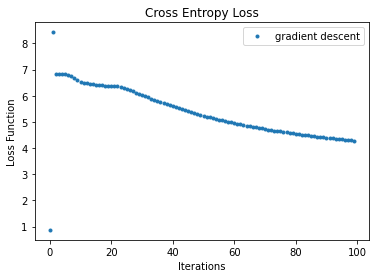

In [7]:
losses, W = gradient_descent(X, y, loss_cross_ent)
plt.plot(range(len(losses)), losses, '.', label='gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss Function')
plt.legend()
plt.title('Cross Entropy Loss')
None